In [3]:
class Tensor:
    """
    Refer The below link to know why mutable datasetrutures cant be in the initialization
    https://stackoverflow.com/questions/4841782/python-constructor-and-default-value
    """
    def __init__(self,value,parent=None,child=None,operation=None,grad=None,gradstatus =0):
        self.value = value
        self.grad = grad
        self.operation = operation
        self.gradstatus = 0
        if child is None:
            self.child = []
        else:
            self.child = child
        if parent is None:
            self.parent = []
        else:
            self.parent = parent
            
        
    def get_value(self):
        return self.value
    def get_consumer(self):
        return self.child
    def get_parent(self):
        return self.parent
    def get_operation(self):
        return self.operation
    def get_grad(self):
        return self.grad
    def get_gradstatus(self):
        return self.gradstatus
    
    def update_child(self,child):
        self.child.append(child)
    def update_value(self,value):
        self.value = value
    def update_grad(self,grad):
        self.grad += grad
   
    def set_grad(self,grad):
        self.grad = grad
    def set_gradstatus(self,stat):
        self.gradstatus = stat
        
    def size(self):
        return 1
    def __repr__(self):
        return 'tensor object:'+ str(id(self)) 

In [225]:
class Convolution2D:
    import numpy as np
    def __init__(self,stride=2,pad=1):
        self.stride = stride
        self.pad = pad
        
    def __call__(self,X,w):
        
        res = Convolution2D.__conv_v5_3d__(X,w,self.stride,self.pad)
        return res
    
    """
    __conv_v1__ : Version 1 of convolution operation in CNN - Unoptimized (Handles only 1 filter at a time, but can be made to handle more)
    __conv_v2__ : Version 2 of convolution operation in CNN - 1st Optimized operation (Handles only 1 filter at a time, but can be made to handle more)
    __conv_v3__ : Version 3 of convolution operation in CNN - 2nd Optimized operation (Handles only 1 filter at a time, but can be made to handle more)
    __conv_v4__ : Version 4 Spinoff of Version3 convolution operation in CNN - 2nd Optimized operation (Handles only 1 filter at a time, but can be made to handle more)
   
    """ 
    
    def __conv_v1__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        #X_val,w_val  = Convolution2D.__test_shape__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D.__assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = res_shape)
        if res_shape:

            for i in range(res_shape[0]):
                for j in range(res_shape[1]):

                    row_idx = np.arange(i,x_shp[1]-w_shp[1]+i+1,stride)
                    col_idx = np.arange(j,x_shp[2]-w_shp[2]+j+1,stride)
                    X_res[i,j] = np.sum(np.multiply(X_val[:,i*stride:(i*stride+w_shp[1]),j*stride:(j*stride+w_shp[2])],w_val))


            return X_res

    def __conv_v2__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = res_shape)
        if res_shape:
            for i in range(w_shp[1]):
                for j in range(w_shp[2]):
                    for l in range(w_shp[0]):
                        row_idx = np.arange(i,x_shp[1]-w_shp[1]+i+1,stride)
                        col_idx = np.arange(j,x_shp[2]-w_shp[2]+j+1,stride)
                        #X_res += np.multiply(X_val[l,row_idx[:, None], col_idx],w_val[l,i,j])#0.20
                        #X_res = np.add(X_res ,np.multiply(X_val[l,row_idx[:, None], col_idx],w_val[l,i,j]))#0.22    
                        #X_res = np.add(X_res ,X_val[l,row_idx[:, None], col_idx]*w_val[l,i,j]) #0.23
                        X_res += X_val[l,row_idx[:, None], col_idx]*w_val[l,i,j] #0.19
            return X_res
    def __conv_v2_3d__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = res_shape)
        if res_shape:
            for k in range(w_shp[0]):
                for i in range(w_shp[2]):
                    for j in range(w_shp[3]):
                        for l in range(w_shp[1]):

                          #  for m in range(x_shp[0]):
                            row_idx = np.arange(i,x_shp[2]-w_shp[2]+i+1,stride)
                            col_idx = np.arange(j,x_shp[3]-w_shp[3]+j+1,stride)
                            #X_res += np.multiply(X_val[l,row_idx[:, None], col_idx],w_val[l,i,j])#0.20
                            #X_res = np.add(X_res ,np.multiply(X_val[l,row_idx[:, None], col_idx],w_val[l,i,j]))#0.22    
                            #X_res = np.add(X_res ,X_val[l,row_idx[:, None], col_idx]*w_val[l,i,j]) #0.23
                            #print(X_val[:,l,row_idx[:, None], col_idx].shape)
                            X_res[:,k,:,:] += X_val[:,l,row_idx[:, None], col_idx]*w_val[k,l,i,j] #0.19
            return X_res
    
    def __back_conv_v2_3d__(X,w,stride,pad,grad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_rev        = np.zeros(shape = x_shp)
        w_rev        = np.zeros(shape = w_shp)
        if res_shape:
            for k in range(w_shp[0]):
                for i in range(w_shp[2]):
                    for j in range(w_shp[3]):
                        for l in range(w_shp[1]):
                            row_idx = np.arange(i,x_shp[2]-w_shp[2]+i+1,stride)
                            col_idx = np.arange(j,x_shp[3]-w_shp[3]+j+1,stride)
                            w_rev[k,l,i,j] = np.sum(grad[:,k,:,:]*X_val[:,l,row_idx[:, None], col_idx])
                            X_rev[:,l,row_idx[:, None], col_idx] += grad[:,k,:,:]*w_val[k,l,i,j]
            return X_rev,w_rev
   
    def __conv_v3__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = res_shape)
        if res_shape:
            for i in range(w_shp[1]):
                for j in range(w_shp[2]):
                    row_idx = np.arange(i,x_shp[1]-w_shp[1]+i+1,stride)
                    col_idx = np.arange(j,x_shp[2]-w_shp[2]+j+1,stride)
                    X_res += np.sum(X_val[:,row_idx[:, None], col_idx]*w_val[:,i,j].reshape(w_shp[0],1,1),axis=0) #0.19
            return X_res
    def __conv_v3_3d__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = res_shape)
        if res_shape:
            for i in range(w_shp[2]):
                for j in range(w_shp[3]):
                    for k in range(w_shp[0]):
                        row_idx = np.arange(i,x_shp[2]-w_shp[2]+i+1,stride)
                        col_idx = np.arange(j,x_shp[3]-w_shp[3]+j+1,stride)
                        X_res[:,k,:,:] += np.sum(X_val[:,:,row_idx[:, None], col_idx]*w_val[k,:,i,j].reshape(1,w_shp[1],1,1),axis=1) #0.19
            return X_res    

    def __conv_v4__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shape    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = (w_shp[0],res_shape[0],res_shape[1]))
        if res_shape:
            for i in range(w_shp[1]):
                for j in range(w_shp[2]):
                    row_idx = np.arange(i,x_shp[1]-w_shp[1]+i+1,stride)
                    col_idx = np.arange(j,x_shp[2]-w_shp[2]+j+1,stride)
                    X_res +=  X_val[:,row_idx[:, None], col_idx]*w_val[:,i,j].reshape(w_shp[0],1,1) 
            return np.sum(X_res,axis=0)
   
    def __conv_v5__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shp    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = (res_shp[0]*res_shp[1],w_shp[1]*w_shp[2]*w_shp[0]))
        if res_shp:
            iter = -1
            for l in range(w_shp[0]):   
                for i in range(w_shp[1]):
                    for j in range(w_shp[2]):
                        iter+=1
                        #print(iter)
                        row_idx = np.arange(i,x_shp[1]-w_shp[1]+i+1,stride)
                        col_idx = np.arange(j,x_shp[2]-w_shp[2]+j+1,stride)
                        X_res[:,iter] = np.reshape(X_val[l,row_idx[:, None], col_idx],(res_shp[0]*res_shp[1]))
            return np.reshape(np.dot(X_res,np.reshape(w_val,(w_shp[0]*w_shp[1]*w_shp[2],1))),(res_shp[0],res_shp[1]))
    
    def __conv_v5_3d__(X,w,stride,pad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shp    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = (x_shp[0],res_shp[2]*res_shp[3],w_shp[2]*w_shp[3]*w_shp[1]))
        if res_shp:
           
            #for k in range(x_shp[0]):
            iter = -1
            for l in range(w_shp[1]):   
                for i in range(w_shp[2]):
                    for j in range(w_shp[3]):

                        iter+=1
                        #print(iter)
                        row_idx = np.arange(i,x_shp[2]-w_shp[2]+i+1,stride)
                        col_idx = np.arange(j,x_shp[3]-w_shp[3]+j+1,stride)
                        # print(np.reshape(X_val[:,l,row_idx[:, None], col_idx],(x_shp[0],res_shp[2]*res_shp[3])).shape)
                        #X_res[k,:,iter] = np.reshape(X_val[k,l,row_idx[:, None], col_idx],(res_shp[2]*res_shp[3]))
                        X_res[:,:,iter] = np.reshape(X_val[:,l,row_idx[:, None], col_idx],(x_shp[0],res_shp[2]*res_shp[3]))
            #W = np.zeros((w_shp[1]*w_shp[2]*w_shp[3],w_shp[0]))
            #for i in range(w_shp[0]):
            #    W[:,i] = np.reshape(w_val[i,:],(w_shp[1]*w_shp[2]*w_shp[3]))
            res=  np.dot(X_res,w_val.reshape(w_shp[0],w_shp[1]*w_shp[2]*w_shp[3],1))#.reshape(x_shp[0],res_shp[2]*res_shp[3],w_shp[1],1)
            Res = np.zeros(res_shp)
            # Remember to use swap axes
            for i in range(w_shp[0]):
            #for j in range(x_shp[0]):
                Res[:,i,:,:] = res[:,:,i].reshape(x_shp[0],res_shp[2],res_shp[3])
            return Res
    def __back_conv_v5_3d__(X,w,stride,pad,grad):
        X_val,w_val  = Convolution2D.__get_input_value__(X,w)
        X_val        = Convolution2D.__pad__( X_val ,pad)
        x_shp,w_shp  = Convolution2D.__get_shape__(X_val,w_val)
        res_shp    = Convolution2D. __assert_shape__(x_shp,w_shp,stride)
        X_res        = np.zeros(shape = (x_shp[0],res_shp[2]*res_shp[3],w_shp[2]*w_shp[3]*w_shp[1]))
        if res_shp:
           
            #for k in range(x_shp[0]):
            iter = -1
            t0 = time.time()
            for l in range(w_shp[1]):   
                for i in range(w_shp[2]):
                    for j in range(w_shp[3]):

                        iter+=1
                        row_idx = np.arange(i,x_shp[2]-w_shp[2]+i+1,stride)
                        col_idx = np.arange(j,x_shp[3]-w_shp[3]+j+1,stride)
                        X_res[:,:,iter] = np.reshape(X_val[:,l,row_idx[:, None], col_idx],(x_shp[0],res_shp[2]*res_shp[3]))
            t1 = time.time()
            print('Inside conv5 loop',t1-t0)
            
            grad_reshaped = np.zeros((res_shp[0],res_shp[2]*res_shp[3],res_shp[1]))
            
            for i in range(w_shp[0]):
                grad_reshaped[:,:,i] = grad[:,i,:,:].reshape(x_shp[0],res_shp[2]*res_shp[3])
                
            x_grad = np.dot(grad_reshaped, w_val.reshape(w_shp[0],w_shp[1]*w_shp[2]*w_shp[3]))
            #print(x_grad.shape,grad_reshaped.shape,w_val.reshape(w_shp[0],w_shp[1]*w_shp[2]*w_shp[3]).shape)
            #x_grad = x_grad.swapaxes(1,2).reshape(x_shp)
            X_grad = np.zeros(x_shp)
            iter = -1
            for l in range(w_shp[1]):   
                for i in range(w_shp[2]):
                    for j in range(w_shp[3]):

                        iter+=1
                        row_idx = np.arange(i,x_shp[2]-w_shp[2]+i+1,stride)
                        col_idx = np.arange(j,x_shp[3]-w_shp[3]+j+1,stride)
                        #X_res[:,:,iter] = np.reshape(X_val[:,l,row_idx[:, None], col_idx],(x_shp[0],res_shp[2]*res_shp[3]))
                        X_grad[:,l,row_idx[:, None], col_idx] += x_grad[:,:,iter].reshape(x_shp[0],res_shp[2],res_shp[3]) 
            
            #print(X_res.shape)
            grad=grad_reshaped.swapaxes(1,2).swapaxes(0,1).reshape(w_shp[0],res_shp[2]*res_shp[3]*x_shp[0])
            X_res= X_res.reshape(res_shp[2]*res_shp[3]*x_shp[0],w_shp[1]*w_shp[2]*w_shp[3])
            w_grad = np.dot(grad,X_res)
            w_grad = w_grad.reshape(w_shp)
            return(X_grad,w_grad)
      
            
            
    def __get_input_value__(input1,input2):
        return (input1.get_value(),input2.get_value())
    
    def __pad__(X_val,pad):
        if len(X_val.shape)==3:
            return np.pad(X_val,((0,0),(pad,pad),(pad,pad)),'constant',constant_values=0)
        elif len(X_val.shape)==4:
            return np.pad(X_val,((0,0),(0,0),(pad,pad),(pad,pad)),'constant',constant_values=0)
    def __get_shape__(X_val,w_val):
        
        #l,m,n = X_val.shape # 3d array:no of channels; m,n - row,col
        #o,p,q = w_val.shape # 3d array:no of filters; p,q - row,col
        return (X_val.shape,w_val.shape)
    def __assert_shape__(x_shp,w_shp,stride):
        if len(x_shp)==3:
            try:
                assert(x_shp[0]==w_shp[0]), 'Wrong channel,filter'
                assert((x_shp[1]-w_shp[1])%stride == 0), 'Wrong stride'
                assert((x_shp[2]-w_shp[2])%stride == 0), 'Wrong stride'
                return (int((x_shp[1]-w_shp[1])/stride+1),int((x_shp[2]-w_shp[2])/stride+1))
            except:
                print('Error: Incompatible Tensor dimensions for convolution')
                return 0
        if len(x_shp)==4:
            try:
                assert(x_shp[1]==w_shp[1]), 'Wrong channel,filter'
                assert((x_shp[2]-w_shp[2])%stride == 0), 'Wrong stride'
                assert((x_shp[3]-w_shp[3])%stride == 0), 'Wrong stride'
                return (x_shp[0],w_shp[0],int((x_shp[2]-w_shp[2])/stride+1),int((x_shp[3]-w_shp[3])/stride+1))
            except:
                print('Error: Incompatible Tensor dimensions for convolution')
                return 0

    def __rect_shape__(X_val,w_val):
        if(len(X_val.shape)==2):
            X_val.reshape(1,X_val.shape)
        if(len(w_val.shape)==2):
            w_val.reshape(1,w_val.shape)
        return X_val,w_val
            

In [184]:
# Testing broadcasting 
"""
https://stackoverflow.com/questions/35226115/numpy-reshaping-multdimensional-array-through-arbitrary-axis
"""
import numpy as np
w = np.random.rand(3,3,3)
x = np.random.rand(3,100,100)
w1 = np.reshape(w[:,1,1],(3,1,1))

np.shape(x*w1)
np.sum(x*w1,axis=0).shape
#np.shape(x[:,5:10,5:10]*w[:,1,1].reshape(3,1,1))
#w

w.reshape(27,1)
x =np.random.rand(3,25,5)
w = np.random.rand(3,5,5)
#print(w)
#print(w.reshape(3,25).T)
#np.dot(x,w).shape
"""
x = np.random.rand(1,9,2)
print(x)

print(x.reshape(1,2,3,3))
print(x.reshape(1,2,3,3))
"""
"""
x = np.random.rand(3,10,1)
print(x)

print(x.reshape(3,2,5))
"""
"""
x = np.random.rand(3,2,2)
print(x)

print(x.reshape(3,4,1))

x = np.random.rand(1,3,2,2)
print(x)

print(x.reshape(3,1,2,2))
"""
#print(x.reshape(1,2,2,5))
"""
x = np.random.rand(3,4,2)
print(x)

print(x.sum(axis=2))
"""
"""
x = np.random.rand(2,3,2,3)
print(x)
print(x.reshape(2,18))
print(x.reshape(2,3,2,3))
"""
"""
t0 = time.time()
gr = np.random.rand(100,196,20).swapaxes(1,2).swapaxes(0,1).reshape(20,196*100)
x = np.random.rand(100,196,75).reshape(100*196,75)


#print(np.dot(y,x).swapaxes(2,3).shape)
print(np.dot(gr,x))
print(np.dot(gr,x).shape)
t1 = time.time()
print(t1-t0)
"""

""" https://stackoverflow.com/questions/42312670/how-does-numpy-swapaxes-work
x = np.random.rand(2,2,3)
print(x)
print(x.swapaxes(1,2).ravel()) # Takes transpose of each 2,3
"""
"""
x = np.random.rand(2,2,3)

print(x)
print(x.swapaxes(0,1).reshape(2,6))
x.swapaxes(0,1)
print(x.reshape(4,3))
#x.reshape(6,2) # Takes transpose
"""
x = np.random.rand(2,6)
print(x)
print(x.reshape(2,2,3))



[[0.90377899 0.76780389 0.55831475 0.59844948 0.61238524 0.02435704]
 [0.6721991  0.30009345 0.45178697 0.63613037 0.33495102 0.03295164]]
[[[0.90377899 0.76780389 0.55831475]
  [0.59844948 0.61238524 0.02435704]]

 [[0.6721991  0.30009345 0.45178697]
  [0.63613037 0.33495102 0.03295164]]]
[[0.90377899 0.76780389 0.55831475 0.59844948 0.61238524 0.02435704]
 [0.6721991  0.30009345 0.45178697 0.63613037 0.33495102 0.03295164]]


In [227]:
# Testing and benchmarking backprop
import numpy as np
import time 
np.random.rand(1)
xval = np.random.rand(100, 3, 31, 31)
wval = np.random.rand(25, 3, 3, 3)
x1 = Tensor(xval)
w1 = Tensor(wval)
t0 = time.time()
Res = Convolution2D.__conv_v5_3d__(x1,w1,stride=2,pad=1)
#print(Res)
t1 = time.time()
print('Forward_prop',t1-t0 )
t0 = time.time()
bk1 = Convolution2D.__back_conv_v2_3d__(x1,w1,stride=2,pad=1,grad=Res)
t1 = time.time()
print('Back_prop',t1-t0 )

t0 = time.time()
bk2 = Convolution2D.__back_conv_v5_3d__(x1,w1,stride=2,pad=1,grad=Res)
t1 = time.time()
print('Back_prop',t1-t0) 
#"""
assert(abs(bk2[0]-bk1[0])<10**-8).all()

Forward_prop 0.07195711135864258
Back_prop 0.39779162406921387
Inside conv5 loop 0.010009527206420898
Back_prop 0.06894254684448242


In [223]:
# Bench Marking for 3d Convolutions
import numpy as np
import time 
np.random.rand(1)
xval = np.random.rand(100, 3, 31, 31)
wval = np.random.rand(25, 3, 3, 3)
#print(xval[1,:,:,:].shape)
#print(wval[1,:,:,:].shape)

x1 = Tensor(xval)
w1 = Tensor(wval)

t0 = time.time()
res1 = Convolution2D.__conv_v2_3d__(x1,w1,stride=2,pad=1)
t1 = time.time()
print('conv2_3d',(t1-t0))

t0 = time.time()
res1 = Convolution2D.__conv_v3_3d__(x1,w1,stride=2,pad=1)
t1 = time.time()
print('conv3_3d',(t1-t0))

t0 = time.time()
res2 = Convolution2D.__conv_v5_3d__(x1,w1,stride=2,pad=1)

t1 = time.time()
print('conv5_3d',(t1-t0))


t0 = time.time()
res3 = np.zeros(res1.shape)

#print(res1.shape,wval.shape)
for i in range(res1.shape[0]):
    for j in range(res1.shape[1]):
        #print(i,j)
        x2  = Tensor(xval[i,:,:,:])
        w2 = Tensor(wval[j,:,:,:])
        res3[i,j,:,:] = Convolution2D.__conv_v2__(x2,w2,stride=2,pad=1)
t1 = time.time()
print('conv2',(t1-t0))
#print(res2.shape,res1.shape)
#assert(res1[1,1,:,:]==res2).all()
assert((res2-res1)<10**-9).all()
#print(res1[1,1,1:10,1:10],res2[1,1,1:10,1:10])
#print(res2-res3)
print('Hence Conv5_3d is better than Conv2_3d for all practical purposes')

conv2_3d 0.15191221237182617
conv3_3d 0.33382511138916016
conv5_3d 0.06496262550354004
conv2 1.448193073272705
Hence Conv5_3d is better than Conv2_3d for all practical purposes


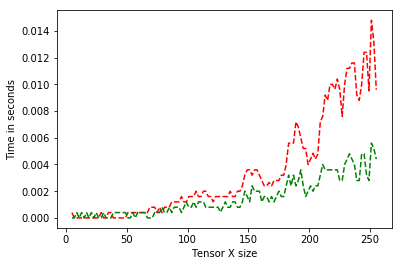

In [263]:
# Bench-Marking conv versions
import numpy as np
conv = Convolution2D()
a = np.random.rand(5,5)

"""
a = a[None,:]
print(a.shape)
print(a)
"""
np.random.seed(1)

x = Tensor(np.random.rand(3,3,3))
w = Tensor(np.random.rand(3,5,5))

""" Testing optimized code"""
I = np.arange(5,257,2)
Time_v1 = np.zeros(shape=(len(I),1))
Time_v2 = np.zeros(shape=(len(I),1))
import time
import matplotlib.pyplot as plt
for rep in range(1):
    tmp1 = []
    tmp2 = []
    for i in I:
        x = Tensor(np.random.rand(3,i,i))

        start = time.time()
        Convolution2D.__conv_v5__(x,w,stride=1,pad=0)
        end = time.time()
        tmp1.append([end-start]) 
        #print('Convolution version1:',end-start)
        start = time.time()
        Convolution2D.__conv_v2__(x,w,stride=1,pad=0)
        end = time.time()
        tmp2.append([end-start])
        #print('Convolution version2 :',end-start)
    Time_v1 += np.array(tmp1)
    Time_v2 += np.array(tmp2)
    
Time_v1 = Time_v1/10
Time_v2 = Time_v2/10
plt.plot(I,Time_v1, 'r--',I,Time_v2, 'g--')
plt.ylabel('Time in seconds')
plt.xlabel('Tensor X size')
plt.show()
#print('CONV_V2 is 3 times faster, unexpected')

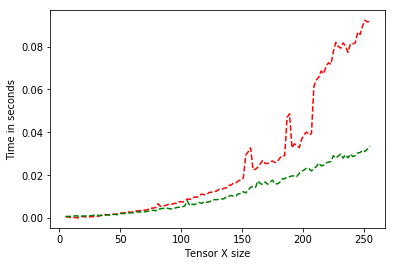

In [69]:
# Bench-Marking conv versions
import numpy as np
conv = Convolution2D()
a = np.random.rand(5,5)

"""
a = a[None,:]
print(a.shape)
print(a)
"""
np.random.seed(1)

x = Tensor(np.random.rand(3,3,3))
w = Tensor(np.random.rand(3,5,5))

""" Testing optimized code"""
I = np.arange(5,257,2)
Time_v1 = np.zeros(shape=(len(I),1))
Time_v2 = np.zeros(shape=(len(I),1))
import time
import matplotlib.pyplot as plt
for rep in range(10):
    tmp1 = []
    tmp2 = []
    for i in I:
        x = Tensor(np.random.rand(3,i,i))

        start = time.time()
        Convolution2D.__conv_v4__(x,w,stride=1,pad=0)
        end = time.time()
        tmp1.append([end-start]) 
        #print('Convolution version1:',end-start)
        start = time.time()
        Convolution2D.__conv_v2__(x,w,stride=1,pad=0)
        end = time.time()
        tmp2.append([end-start])
        #print('Convolution version2 :',end-start)
    Time_v1 += np.array(tmp1)
    Time_v2 += np.array(tmp2)
    
Time_v1 = Time_v1/10
Time_v2 = Time_v2/10
plt.plot(I,Time_v1, 'r--',I,Time_v2, 'g--')
plt.ylabel('Time in seconds')
plt.xlabel('Tensor X size')
plt.show()
#print('CONV_V2 is 3 times faster, unexpected')

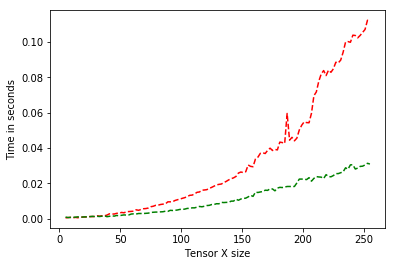

CONV_V2 is 3 times faster, unexpected


In [50]:
# Bench-Marking conv versions
import numpy as np
conv = Convolution2D()
a = np.random.rand(5,5)

"""
a = a[None,:]
print(a.shape)
print(a)
"""
np.random.seed(1)

x = Tensor(np.random.rand(3,3,3))
w = Tensor(np.random.rand(3,5,5))

""" Testing optimized code"""
I = np.arange(5,257,2)
Time_v1 = np.zeros(shape=(len(I),1))
Time_v2 = np.zeros(shape=(len(I),1))
import time
import matplotlib.pyplot as plt
for rep in range(10):
    tmp1 = []
    tmp2 = []
    for i in I:
        x = Tensor(np.random.rand(3,i,i))

        start = time.time()
        Convolution2D.__conv_v3__(x,w,stride=1,pad=0)
        end = time.time()
        tmp1.append([end-start]) 
        #print('Convolution version1:',end-start)
        start = time.time()
        Convolution2D.__conv_v2__(x,w,stride=1,pad=0)
        end = time.time()
        tmp2.append([end-start])
        #print('Convolution version2 :',end-start)
    Time_v1 += np.array(tmp1)
    Time_v2 += np.array(tmp2)
    
Time_v1 = Time_v1/10
Time_v2 = Time_v2/10
plt.plot(I,Time_v1, 'r--',I,Time_v2, 'g--')
plt.ylabel('Time in seconds')
plt.xlabel('Tensor X size')
plt.show()
print('CONV_V2 is 3 times faster, unexpected')

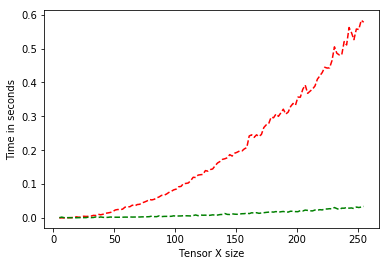

In [31]:
# Bench-Marking conv versions 1 and 2
import numpy as np
conv = Convolution2D()
a = np.random.rand(5,5)

"""
a = a[None,:]
print(a.shape)
print(a)
"""
np.random.seed(1)

x = Tensor(np.random.rand(3,3,3))
w = Tensor(np.random.rand(3,5,5))
#print(np.sum(w.value[:,2,2]*x.value[:,0,0]))
#print(np.sum(w.value[:,:,:]*x.value[:,0:3,0:3]))
""" Testing optimized code"""
I = np.arange(5,257,2)
Time_v1 = np.zeros(shape=(len(I),1))
Time_v2 = np.zeros(shape=(len(I),1))
import time
import matplotlib.pyplot as plt
for rep in range(10):
    tmp1 = []
    tmp2 = []
    for i in I:
        x = Tensor(np.random.rand(3,i,i))

        start = time.time()
        Convolution2D.__conv_v1__(x,w,stride=1,pad=0)
        end = time.time()
        tmp1.append([end-start]) 
        #print('Convolution version1:',end-start)
        start = time.time()
        Convolution2D.__conv_v2__(x,w,stride=1,pad=0)
        end = time.time()
        tmp2.append([end-start])
        #print('Convolution version2 :',end-start)
    Time_v1 += np.array(tmp1)
    Time_v2 += np.array(tmp2)
    
Time_v1 = Time_v1/10
Time_v2 = Time_v2/10
plt.plot(I,Time_v1, 'r--',I,Time_v2, 'g--')
plt.ylabel('Time in seconds')
plt.xlabel('Tensor X size')
plt.show()


In [199]:
print(Time_v1[20],Time_v2[20],I[20])


[0.01439664] [0.00159981] 45


In [170]:
# Matrix mult
a = np.random.rand(363 , 3025)
b =np.random.rand(1,363)

start = time.time()
np.dot(b,a)
end = time.time()
print(end-start)

x = Tensor(np.random.rand(3,227,227))
w = Tensor(np.random.rand(3,11,11))
start = time.time()
Convolution2D.__conv_v2__(x,w,stride=4,pad=0)
end = time.time()
print(end-start)
start = time.time()
Convolution2D.__conv_v1__(x,w,stride=4,pad=0)
end = time.time()
print(end-start)

0.0040056705474853516
0.019962549209594727
0.03998994827270508


In [47]:

x = Tensor(np.random.random((3,31, 31)).astype(np.float32))
y = Tensor(np.random.random((3,3, 3)).astype(np.float32))
start = time.time()
for i in range(2500):
    Convolution2D.__conv_v2__(x,y,stride=2,pad=0)
end = time.time()
print((end-start))

0.9594497680664062


In [126]:
import numpy as np
a = np.array([[[5,6],[5,6]],[[5,6],[5,6]]])
a.shape
np.pad(a,((0,0),(1,1),(1,1)),'constant', constant_values=0)


0
1
2
3
4


In [75]:
import numpy as np
conv = Convolution2D()
a = np.random.rand(5,5)
print(len(a.shape))

2


In [15]:
4.0%2==0

True

In [61]:
np.random.seed(1)
a = np.random.rand(5,6)
#print(a)
print(a[[0,2,4],[1,2,3]])
print(a[0,1],a[2,2],a[4,3])
b =1 
if b:
    print('Hell')
    print(np.zeros(shape = (5,5)))


[0.72032449 0.02738759 0.03905478]
0.7203244934421581 0.027387593197926163 0.03905478323288236
Hell
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [141]:
# https://stackoverflow.com/questions/22927181/selecting-specific-rows-and-columns-from-numpy-array
import numpy as np
a = np.arange(20).reshape((5,4))
row_idx = np.array([0, 1, 3])
col_idx = np.array([0, 2])
print(a)
print(a[row_idx[:, None], col_idx])
print(a[row_idx, col_idx[:, None]])
print(row_idx[:, None])
print(col_idx)
print(col_idx[:, None])
print(row_idx)
#X : 11x11
#W: 3x3
#st : 4
#res X = (11-3)/4 + 1 = 3
np.arange(0,10,4)
#X : 11x11
#W: 2x2
#st : 3
#res X = (11-2)/3 + 1 = 4
np.arange(2,10,3)
#X : 9x9
#W: 3x3
#st : 2
#res X = (9-3)/2 + 1 = 4
np.arange(2,9,2)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[ 0  2]
 [ 4  6]
 [12 14]]
[[ 0  4 12]
 [ 2  6 14]]
[[0]
 [1]
 [3]]
[0 2]
[[0]
 [2]]
[0 1 3]


array([1, 2, 3, 4])